
<br>
<font face="Times New Roman">
<div dir=ltr align=center>
<font color=0F5298 size=7>
Digital Image Processing <br>
<font color=2565AE size=5>
Department Of Mathematical Sciences <br>
Spring 2025<br>
<font color=3C99D size=5>
Assignment 1 <br>
</div>


---



### Full Name : Raya Namazi
### Student Number : 402100561
___

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
cd /content/drive/MyDrive/DIP/hw1-practical

/content/drive/MyDrive/DIP/hw1-practical


## Introduction

In this assignment, we are going to investigate some of the basic methods of image enhancement.

## Section 1: Image Enhancement

Importing necessary Libraries. You cannot import and use any other libraries

In [20]:
# Do not modify this cell
import cv2
import numpy as np
import matplotlib.pylab as plt


### Q1: Intensity Enhancement


In this question, you will implement some of the intensity processing functions and apply them on a given image. In the final part, you will be asked to use these functions to enhance the intensity of a given image.

<ol>
<li>
 <b>Negative Transform :</b> $y=255-x$

 <li>
 <b>Log Transform :</b> $y=\frac{255 \log(1+ \alpha x)}{\log(1+255 \alpha)}$

 <li>
 <b>Gamma Transform :</b> $y=255(\frac{x}{255})^{\gamma}$

 </ol>

In the following cells, complete the functions for

In [21]:

def negative_transform(img: np.ndarray):
 return 255-img

In [9]:
def log_transform(img: np.ndarray, alpha):
   img = np.float32(img)
   img = 255 * np.log(1 + alpha * img) / np.log(1 + 255 * alpha)
   return np.uint8(np.clip(img, 0, 255))


In [22]:
def gamma_transform(img: np.ndarray, gamma):
    img = np.float32(img) / 255
    img = 255 * (img ** gamma)
    return np.uint8(np.clip(img, 0, 255))

Now, apply these transformations on `Q1-input1.jpg` (on RGB channels) and save the output images in `Q1-output-neg.jpg`, `Q1-output-log.jpg` and `Q1-output-gamma.jpg`, respectively. You can set $\alpha$ and $\gamma$ whatever you want, but effect on the intensity of the image should be noticable.

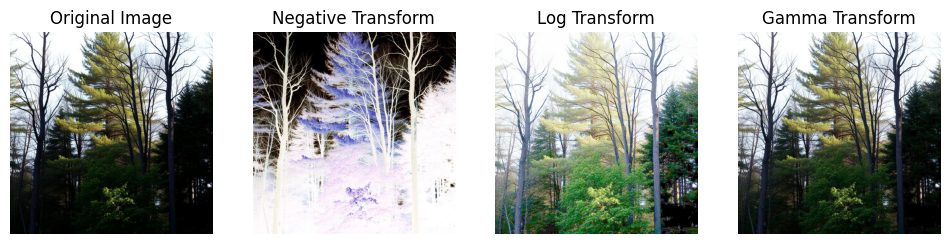

In [23]:
img =cv2.imread('Q1-input1.jpg')
neg_img = negative_transform(img)
log_img = log_transform(img, 0.84)
gamma_img = gamma_transform(img, 0.7)

cv2.imwrite("Q1-output-neg.jpg", neg_img)
cv2.imwrite("Q1-output-log.jpg", log_img)
cv2.imwrite("Q1-output-gamma.jpg", gamma_img)

plt.figure(figsize=(12,6))

plt.subplot(1, 4, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(cv2.cvtColor(neg_img, cv2.COLOR_BGR2RGB))
plt.title("Negative Transform")
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(cv2.cvtColor(log_img, cv2.COLOR_BGR2RGB))
plt.title("Log Transform")
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(cv2.cvtColor(gamma_img, cv2.COLOR_BGR2RGB))
plt.title("Gamma Transform")
plt.axis('off')

plt.show()


Finally, use the functions you implemented to enhance the intensity of `Q1-input2.jpg`. You may use any of the functions in anyway you desire. Your final score on the question depends on the quality of the output. Save the output image as `Q1-output-enhanced.jpg`.

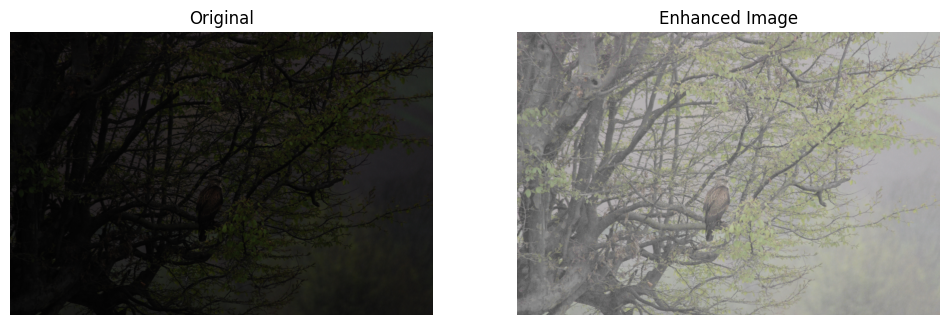

In [24]:
img =cv2.imread('Q1-input2.JPG')
# TODO: enhance the intensity of the input image

gamma_corrected = gamma_transform(img, 0.85)
log_corrected = log_transform(gamma_corrected, 1.1)

cv2.imwrite("Q1-output-enhanced.jpg", log_corrected)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(log_corrected, cv2.COLOR_BGR2RGB))
plt.title("Enhanced Image")
plt.axis("off")

plt.show()


### Q2: Histogram Specification


In this question, we will implement histogram specification for intensity enhancement.

Complete the following code to specify the histogram of the input image, with a given histogram `hist1`, to target histogram `hist2`.

**Note**: Assume that the input image has only one channel, i.e, it is a $H \times W$ numpy array.

In [25]:
def histogram_specification(img: np.ndarray, hist1: np.ndarray, hist2: np.ndarray):
  # TODO : implement histogram specification
  cdf1 = np.cumsum(hist1)
  cdf2 = np.cumsum(hist2)
  cdf1 = cdf1 / cdf1[-1]
  cdf2 = cdf2 / cdf2[-1]

  mapping = np.zeros(256, dtype=np.uint8)

  for i in range(256):
    closest_idx = np.argmin(np.abs(cdf1[i] - cdf2))
    mapping[i] = closest_idx

  output_img = mapping[img]
  return output_img

To test the above code, open `Q2-input1.jpg` and `Q2-input2.jpg`, and convert the histogram of the first one to the second one. Save the resulting image as `Q2-output.jpg`. The aim of specifying the histograms is to enhance the first image, so your score depends on the quality of your result.

(np.float64(-0.5), np.float64(2207.5), np.float64(1655.5), np.float64(-0.5))

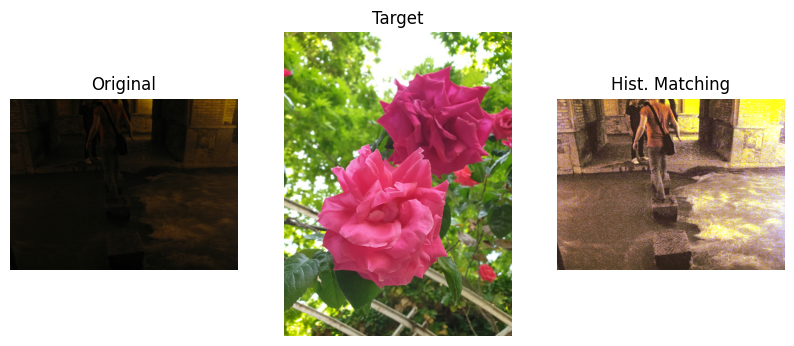

In [26]:
img1=cv2.imread('Q2-input1.jpg')
img2=cv2.imread('Q2-input2.jpg')
# TODO: Apply histogram specification
b1, g1, r1 = cv2.split(img1)
b2, g2, r2 = cv2.split(img2)

hist_r1, _ = np.histogram(r1.flatten(), bins=256, range=[0, 256])
hist_g1, _ = np.histogram(g1.flatten(), bins=256, range=[0, 256])
hist_b1, _ = np.histogram(b1.flatten(), bins=256, range=[0, 256])
hist_r2, _ = np.histogram(r2.flatten(), bins=256, range=[0, 256])
hist_g2, _ = np.histogram(g2.flatten(), bins=256, range=[0, 256])
hist_b2, _ = np.histogram(b2.flatten(), bins=256, range=[0, 256])
output_r = histogram_specification(r1, hist_r1, hist_r2)
output_g = histogram_specification(g1, hist_g1, hist_g2)
output_b = histogram_specification(b1, hist_b1, hist_b2)
output_image = cv2.merge([output_b, output_g, output_r])
cv2.imwrite("Q2-output.jpg", output_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 2)
plt.title("Target")
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 3, 3)
plt.title("Hist. Matching")
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.axis("off")


### Q3: Color Processing

In image `Q3-input.jpg`, change the color of the flowers red, blue and yellow to violet, pink and orange respectively. Save the result as `Q3-output.jpg`. Your score of this question depends on the quality of the output image.

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

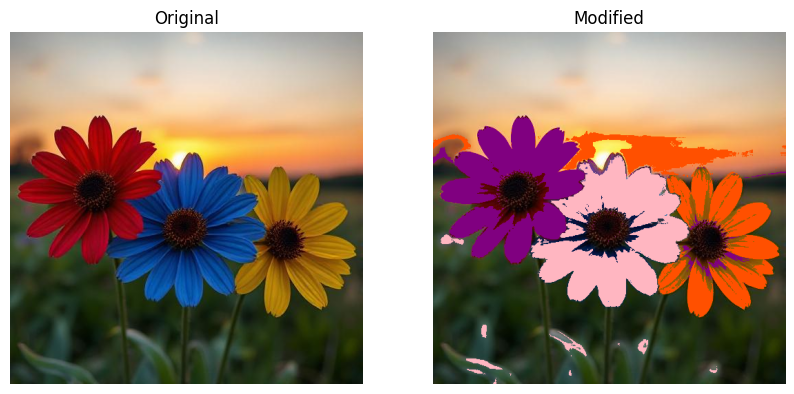

In [28]:
img=cv2.imread('Q3-input.jpg')
# TODO: change the colors

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
lower_red = np.array([100, 0, 0], dtype=np.uint8)
upper_red = np.array([255, 70, 70], dtype=np.uint8)
lower_blue = np.array([0, 0, 80], dtype=np.uint8)
upper_blue = np.array([90, 110, 255], dtype=np.uint8)
lower_yellow = np.array([100, 100, 0], dtype=np.uint8)
upper_yellow = np.array([255, 255, 75], dtype=np.uint8)
mask_red = cv2.inRange(img_rgb, lower_red, upper_red)
mask_blue = cv2.inRange(img_rgb, lower_blue, upper_blue)
mask_yellow = cv2.inRange(img_rgb, lower_yellow, upper_yellow)
img_rgb[mask_red > 0] = [128, 0, 128]
img_rgb[mask_blue > 0] = [255, 182, 193]
img_rgb[mask_yellow > 0] = [255, 80, 0]
img_output = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR)
cv2.imwrite('Q3-output.jpg', img_output)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Modified")
plt.imshow(cv2.cvtColor(img_output, cv2.COLOR_BGR2RGB))
plt.axis("off")


## Section 2: Spatial Filters

### Q4: Blurring

In this question, you are going to implement a function to blur a given image using a specified method. Your function should support box filter, gaussian filter and median filter. It is permitted to use `opencv` to perform the bluring.

In [34]:
def blur(img: np.ndarray, kernel_size: int, filter: string):
  # TODO: implement blurring for box filter, Gaussian Blurring and median blurring
  # in the next cell
    pass

Test your code with kernel size $k=3, 11, 25$ for each of filters on `Q4-input.jpg`. Save the output images with the following format:
<ul>
<li> Box filter with kernel size $k=3, 11, 25$ as Q4-output-box3.jpg, Q4-output-box11.jpg and Q4-output-box25.jpg.

<li> Gaussian filter with kernel size $k=3, 11, 25$ as Q4-output-gauss3.jpg, Q4-output-gauss11.jpg and Q4-output-gauss25.jpg (you can set $\sigma$ whaever you wish, but blurring should be observable).

<li> Median filter with kernel size $k=3, 11, 25$ as Q4-output-med3.jpg, Q4-output-med11.jpg and Q4-output-med25.jpg.
</ul>

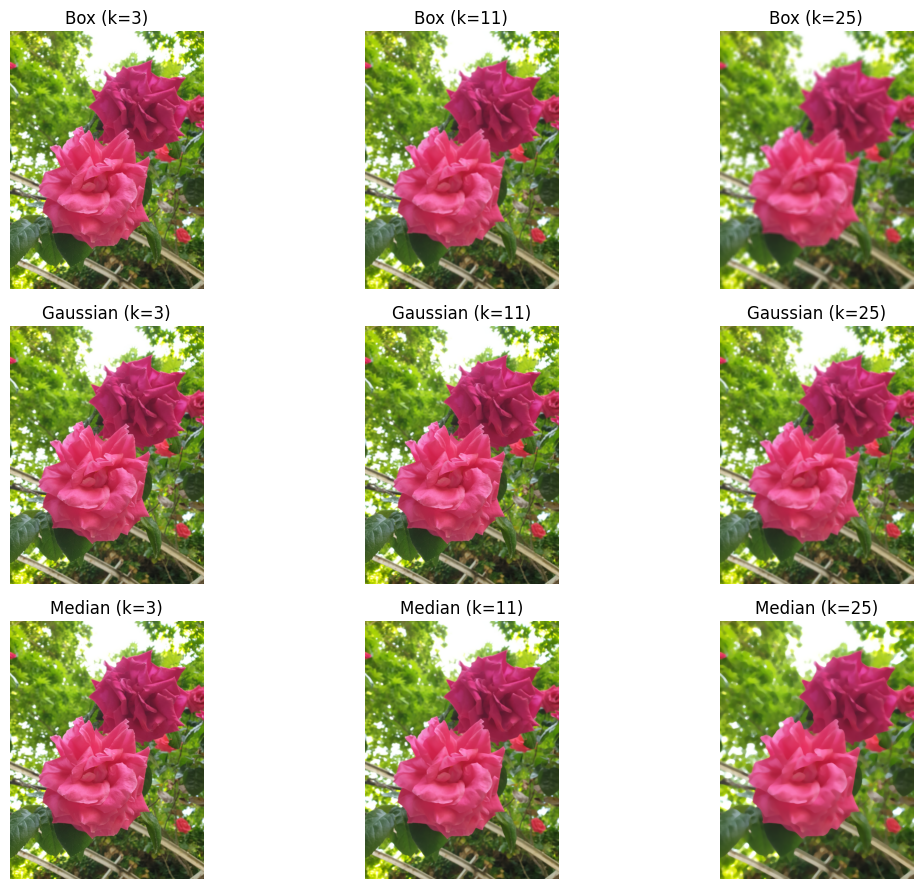

In [35]:
img=cv2.imread('Q4-input.jpg')
# TODO: Apply the filters
kernel_sizes = [3, 11, 25]

blurred_images = []
titles = []

# Box Filter
for k in kernel_sizes:
    box_blur = cv2.blur(img, (k, k))
    blurred_images.append(box_blur)
    titles.append(f"Box (k={k})")
    cv2.imwrite(f"Q4-output-box{k}.jpg", box_blur)

# Gaussian Filter
for k in kernel_sizes:
    gauss_blur = cv2.GaussianBlur(img, (k, k), sigmaX=k//6)
    blurred_images.append(gauss_blur)
    titles.append(f"Gaussian (k={k})")
    cv2.imwrite(f"Q4-output-gauss{k}.jpg", gauss_blur)

# Median Filter
for k in kernel_sizes:
    median_blur = cv2.medianBlur(img, k)
    blurred_images.append(median_blur)
    titles.append(f"Median (k={k})")
    cv2.imwrite(f"Q4-output-med{k}.jpg", median_blur)

plt.figure(figsize=(12, 9))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(cv2.cvtColor(blurred_images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()

### Q5: Sharpening

In this question, you are going to sharpen a given image using Gaussian Filter.


Let $f$ be the source image and $g$ be the Gaussian kernel, then $f*g$ is the convolution of the image with this kernel, which results in a blurred image.

To sharpen the image, we can generate an unsharp mask by subtracting the blurred image from the original image:
$$m=f-f*g$$
This mask is a transparent image which has higher intensity on the edges of the original image. Now we may add this mask with a weight $\alpha$ to sharpen the original image:
$$f'=f+ \alpha m$$

First, complete the following function to generate a Gaussian kernel with a given size and $\sigma$. A $(2k+1) \times (2k+1)$ Gaussian kernel has the value $e^{\frac{-(x^2+y^2)}{2 \sigma^2}}$ at point $(x,y)$ (Center of the kernel has coordinates $(0,0)$, and we have $x,y \in [-k,k]$). You should also normalize the kernel (sum of the entries should app up to 1)

In [36]:
def gaussian_kernel(kernel_size: int, sigma):
     k = kernel_size // 2
     x, y = np.meshgrid(np.arange(-k, k+1), np.arange(-k, k+1))
     kernel = np.exp(-(x**2 + y**2) / (2 * sigma**2))
     return kernel / np.sum(kernel)

Next, complete the following function to sharpen a given image and Gaussian kernel and $\alpha$. Your function should return both the sharpened image and the unsharp mask.

In [37]:
def gaussian_sharpen(img: np.ndarray, kernel: np.ndarray, alpha: float):
     blurred = cv2.filter2D(img, -1, kernel)
     unsharp_mask = cv2.subtract(img, blurred)
     sharpened = cv2.addWeighted(img, 1, unsharp_mask, alpha, 0)
     return sharpened, unsharp_mask

Now to test your code, open `Q5-input.jpg` and sharpen it using the above function. Use a kernel size of 7 and choose a suitable value of $\sigma$ and $\alpha$ to get a desirable result. Save the sharpened image as `Q5-output-1.jpg` and the unsharp mask (grayscale image) as `Q5-output-2.jpg`. Your score on this part depends on the quality of the result.

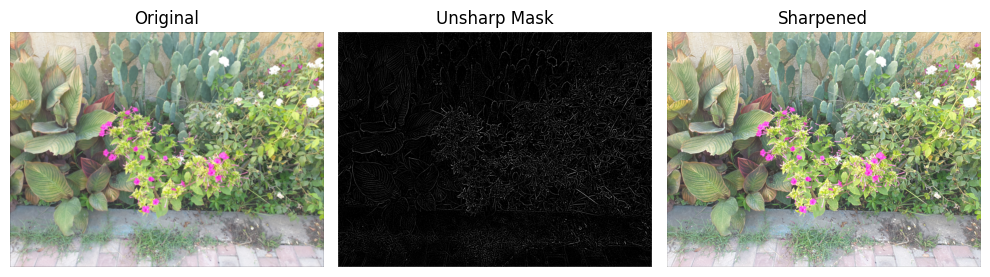

In [38]:
img=cv2.imread('Q5-input.png')
# TODO: Sharpen the image and save the result and the unsharp mask
kernel_size = 7
sigma = 1
gaussian_k = gaussian_kernel(kernel_size, sigma)
alpha = 3  # Adjust for best effect
sharpened_img, unsharp_mask = gaussian_sharpen(img, gaussian_k, alpha)
cv2.imwrite('Q5-output-1.jpg', sharpened_img)
cv2.imwrite('Q5-output-2.jpg', cv2.cvtColor(unsharp_mask, cv2.COLOR_BGR2GRAY))

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(unsharp_mask, cv2.COLOR_BGR2GRAY), cmap='gray')
plt.title("Unsharp Mask")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sharpened_img, cv2.COLOR_BGR2RGB))
plt.title("Sharpened")
plt.axis("off")

plt.tight_layout()
plt.show()

### Q6: Noise removal

## A) ACE Function
Implement the ACE function using ready-made functions for histogram equalization and padding. Apply the function with different grid sizes on ACE.jpg image and report the output for each one. Also specify which output is the best.

## B) CLAHE Function
Implement the CLAHE function and apply it to CLAHE.jpg image. Also specify which output is the best. In this function, test different values for the clipping threshold and grid size, analyze the effect of each, and output the best result.

## C) add_noise Function
Complete the add_noise function to add Gaussian or Salt-and-Pepper noise to the image. Using existing library functions is not allowed. Read the noise.tif image in grayscale and add Gaussian and Salt-and-Pepper noise separately to the image and display the output.

## D) denoise Function
Save the image resulting from adding Salt-and-Pepper noise and denoise it using an appropriate filter.

In [39]:
def ACE(image, gridSize):
  '''
  inputs:
    image (ndarray): input image
    gridSize (tuple): window size for calculating histogram equalization
  output:
    output (ndarray): improved image
  '''

  ###############################################
  ############# YOUR CODE GOES HERE #############
  if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  output = cv2.equalizeHist(image)


  ###############################################
  return output

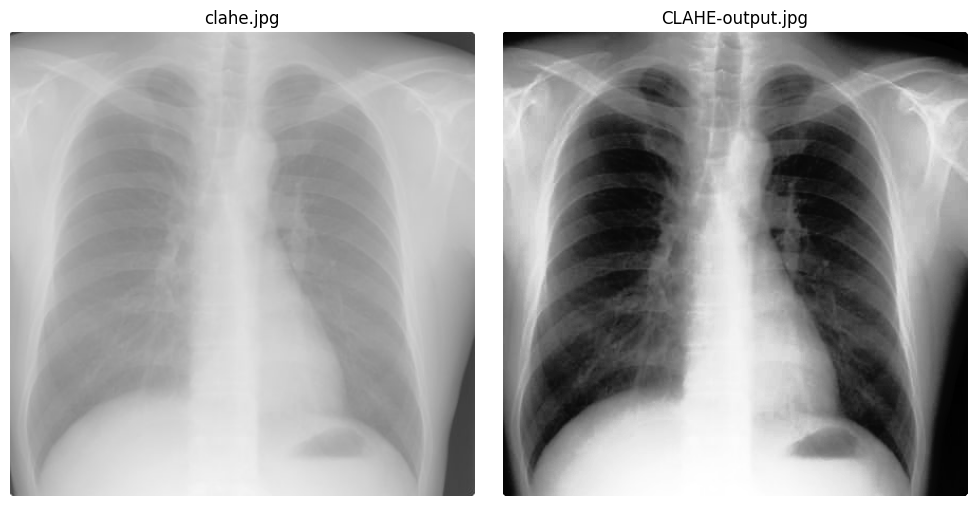

In [40]:
###############################################
######## PLOT INPUT AND OUTPUT IMAGES##########

img = cv2.imread('ACE.jpg', cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.title("clahe.jpg")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(ACE(img, None), cv2.COLOR_RGB2BGR))
plt.title("CLAHE-output.jpg")
plt.axis("off")

plt.tight_layout()
plt.show()

###############################################

In [41]:
def CLAHE(image, gridSize, threshold):
  '''
  inputs:
    image (ndarray): input image
    gridSize (tuple): window size for calculating histogram equalization
    threshold (int): threshold for contrast limiting
  output:
    output (ndarray): improved image
  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############

  clahe = cv2.createCLAHE(clipLimit=threshold, tileGridSize=gridSize)
  output = clahe.apply(image)
  ###############################################
  return output

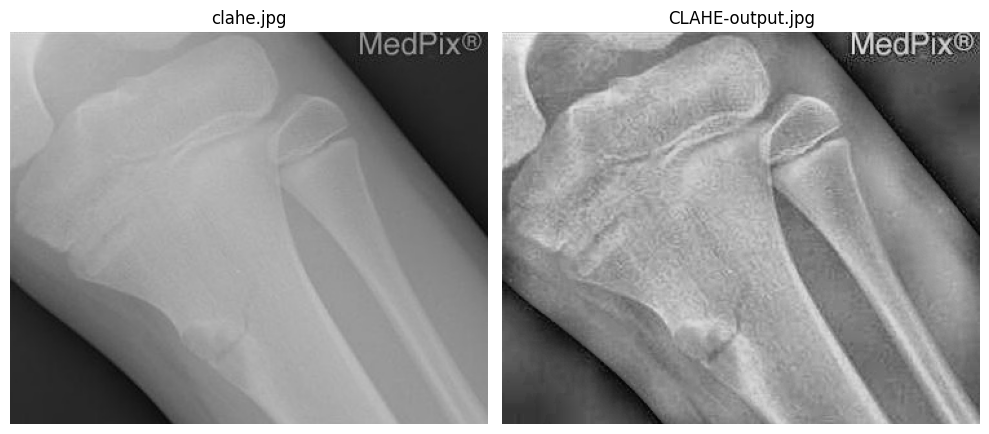

In [42]:
###############################################
######## PLOT INPUT AND OUTPUT IMAGES##########
image_clahe = cv2.imread("CLAHE.jpg", cv2.IMREAD_GRAYSCALE)
clahe_output = CLAHE(image_clahe, (8, 8), 4.0)

cv2.imwrite("CLAHE-output.jpg", clahe_output)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image_clahe, cv2.COLOR_BGR2RGB))
plt.title("clahe.jpg")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(clahe_output, cv2.COLOR_BGR2RGB))
plt.title("CLAHE-output.jpg")
plt.axis("off")


plt.tight_layout()
plt.show()
###############################################

In [43]:
def add_noise(image, noise_type, args):

  '''
  inputs:
    image (ndarray): This is the input image represented as a NumPy array.

    noise_type (int): This parameter specifies which type of noise to add.
    It can take the following values:
    0: Gaussian Noise
    1: Salt-and-Pepper Noise

    args (list): A list of arguments that contains additional parameters needed for each noise mode.The required arguments are different depending on the noise_type.

  output:
    output_image (ndarray): noisy image.


  1. Gaussian Noise (noise_type = 0):

    Arguments (passed via args):
    mean: The mean of the Gaussian distribution (center value of noise).
    sigma: the standard deviation (sigma) of the Gaussian distribution.

    How it works:
    Generate Gaussian noise with this mean and sigma that has the same shape as the input image.
    Add this noise to the original image to create the noisy image.

  2. Salt-and-Pepper Noise (noise_type = 1):

    Arguments (passed via args):
    prob: The probability of a pixel being changed to Salt, Pepper, or staying unchanged.

    How it works:
    For each pixel in the image, generate a random number.
    If the random number is less than prob, change the pixel value to Salt (255).
    If the random number is greater than 1 - prob, change the pixel value to Pepper (0).
    Otherwise, leave the pixel unchanged.

  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############

  noisy_image = image.copy()

  if noise_type == 0:  # Gaussian Noise
        mean, sigma = args
        gaussian_noise = np.random.normal(mean, sigma, noisy_image.shape).astype(np.uint8)
        noisy_image = cv2.add(noisy_image, gaussian_noise)

  elif noise_type == 1:  # Salt-and-Pepper Noise
        prob = args[0]
        rand_matrix = np.random.rand(*noisy_image.shape)

        noisy_image[rand_matrix < prob] = 0   # Pepper (Black)
        noisy_image[rand_matrix > 1 - prob] = 255  # Salt (White)

  return noisy_image

  ###############################################
  return output


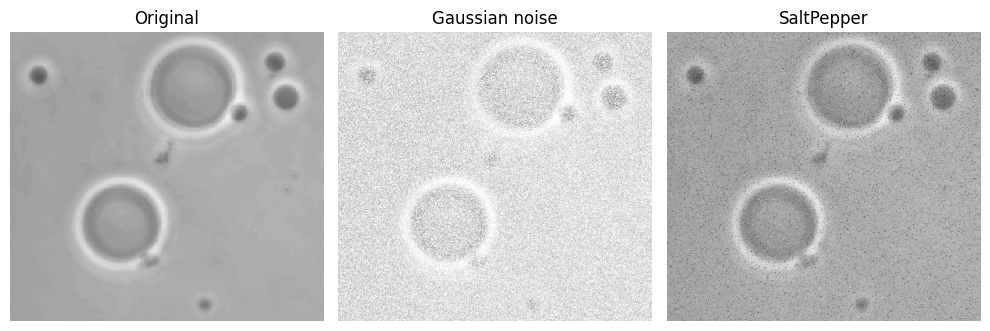

In [45]:
###############################################
######## PLOT INPUT AND OUTPUT IMAGES##########
image_noise = cv2.imread("noise.tif", cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Noise
gaussian_noisy = add_noise(image_noise, 0, [0, 30])
cv2.imwrite("Gaussian-noise.jpg", gaussian_noisy)

# Apply Salt-and-Pepper Noise
sp_noisy = add_noise(image_noise, 1, [0.02])
cv2.imwrite("SaltPepper-noise.jpg", sp_noisy)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(image_noise, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(gaussian_noisy, cv2.COLOR_BGR2RGB))
plt.title("Gaussian noise")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(sp_noisy, cv2.COLOR_BGR2RGB))
plt.title("SaltPepper")
plt.axis("off")

plt.tight_layout()
plt.show()

###############################################

In [46]:
def denoise(noisy_image):

  '''
  input:
    noisy_image (ndarray): the noisy image

  output:
    output_image (ndarray): denoised image

  '''
  ###############################################
  ############# YOUR CODE GOES HERE #############

  output = cv2.medianBlur(noisy_image, 5)

  ###############################################
  return output



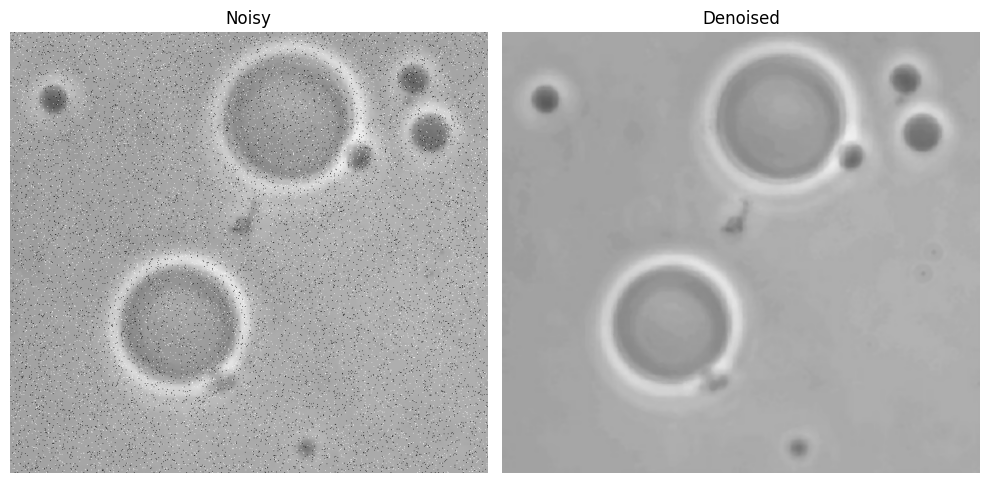

In [137]:
###############################################
######## PLOT INPUT AND OUTPUT IMAGES##########
denoised_sp = denoise(sp_noisy)
cv2.imwrite("Denoised-output.jpg", denoised_sp)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(sp_noisy, cv2.COLOR_BGR2RGB))
plt.title("Noisy")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(denoised_sp, cv2.COLOR_BGR2RGB))
plt.title("Denoised")
plt.axis("off")

plt.tight_layout()
plt.show()

###############################################